<a href="https://colab.research.google.com/github/Jathin009/dataeng_class/blob/main/DataGatheringusingBeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bs4

In [ ]:
##DATA GATHERING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup


url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
#print(type(soup))

title = soup.title
#print(title)

#Print the text
text = soup.get_text()
#print(soup.text)

all_links = soup.find_all('a')

# for link in all_links:
#     print(link.get('href'))


#Print the 10 rows for sanity check
rows = soup.find_all("tr")
#print(rows[:10])

for row in rows:
    row_td = row.find_all("td")
#print(row_td)

str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells,'lxml').get_text()
print(cleantext)

import re
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', str_cells))
    list_rows.append(clean2)
print(clean2)

df = pd.DataFrame(list_rows)
df.head(10)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]
[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [ ]:
## DATA TRANSFORMATION

df1 = df[0].str.strip('[').str.strip(']').str.split(',', expand=True)
df1.head(10)


col_labels = soup.find_all('th')

all_header = []

col_str = str(col_labels)

cleantext2 = BeautifulSoup(col_str, 'lxml').get_text()
all_header.append(cleantext2)
print(all_header)

df2 = pd.DataFrame(all_header)
df2.head()

df3 = df2[0].str.split(',', expand= True)
df3.head()

frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)


df5 = df4.rename(columns=df4.iloc[0])
df5.head()

df5.info()
df5.shape

df6 = df5.dropna(axis=0, how="any")
df6.info()
df6.shape


df7 = df6.drop(df6.index[0])
df7.head()


#Already done, but keeping it as it was ssen in document
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()
df7['Team'] = df7['Team'].str.strip(']').str.replace('\r\n', '').str.replace('\n','')
df7[' Name'] = df7[' Name'].str.replace('\r\n', '')
df7[' Gun Time'] = df7[' Gun Time'].str.replace(' ', '')
df7.head()

#Dropping all \r and n from the columns


# df7['Name'] = df7['Name'].str.replace('\r\n', '')
# df7['Team'] = df7['Team'].str.replace('\r\n', '')
# df7['Name'] = df7['Name'].str.strip().str.strip('\r\n')
# df7.head()




['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']
<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     578 non-null    object
 1    Bib       578 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...


In [ ]:
#Data Analysis and Visualization

time_list = df7[' Gun Time'].tolist()

time_mins = []

for i in time_list:
    split_result = i.split(':')
    if len(split_result) == 3:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
        time_mins.append(math)
    else:
        m, s = i.split(':')
        math = (int(m) * 60 + int(s))/60
        time_mins.append(math)


df7['Runner_mins'] = time_mins
df7.head()
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.631340
std,12.110846
min,36.400000
25%,51.450000
50%,59.900000
75%,68.000000
max,102.166667


([<matplotlib.axis.XTick at 0x7f9ae697e7a0>], [Text(1, 0, 'Runners')])

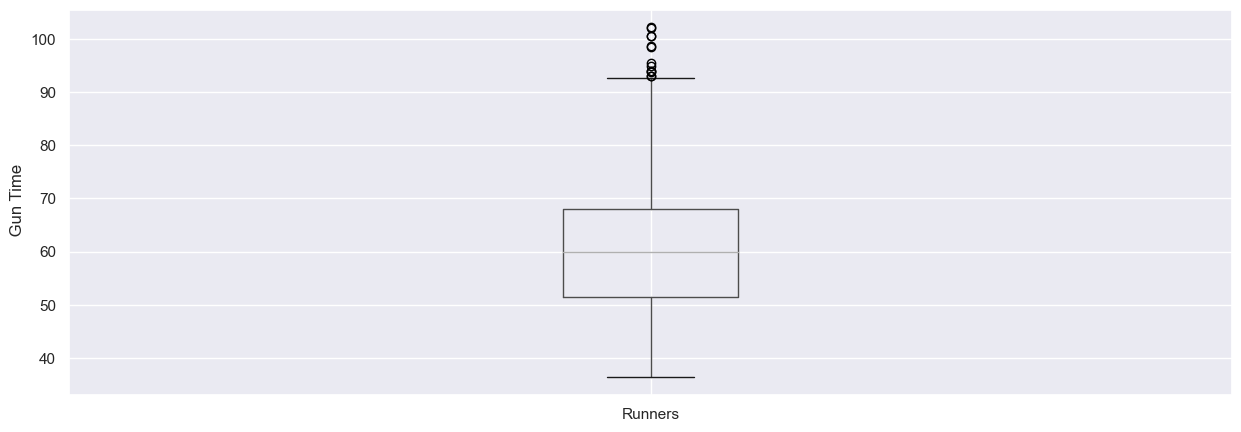

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel(' Gun Time')
plt.xticks([1], ['Runners'])

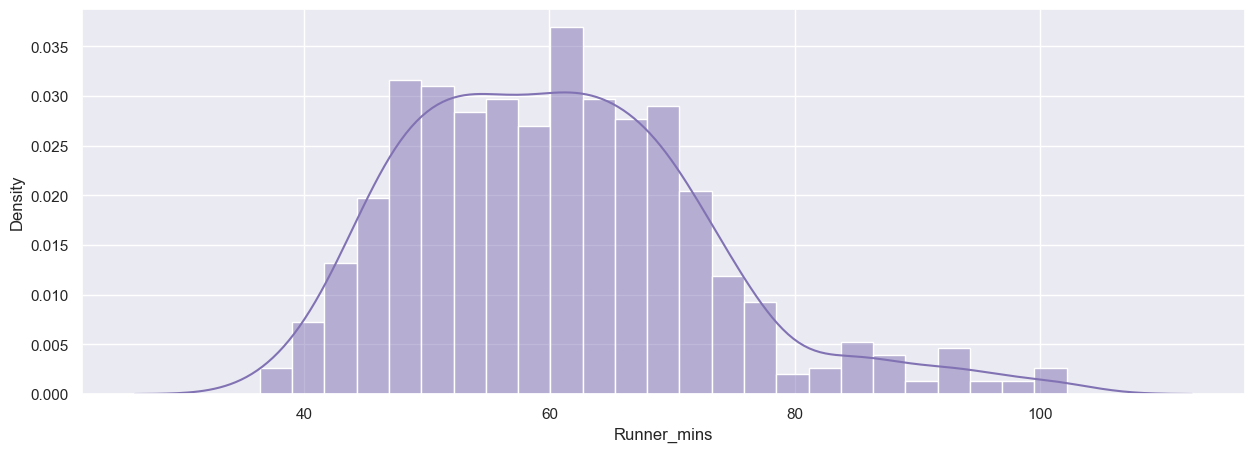

In [ ]:
x = df7['Runner_mins']
#distplot is deprecated
# ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
# plt.show()
sns.histplot(x, kde=True,color='m', stat="density", bins=25, kde_kws=dict(cut=3))
plt.show()

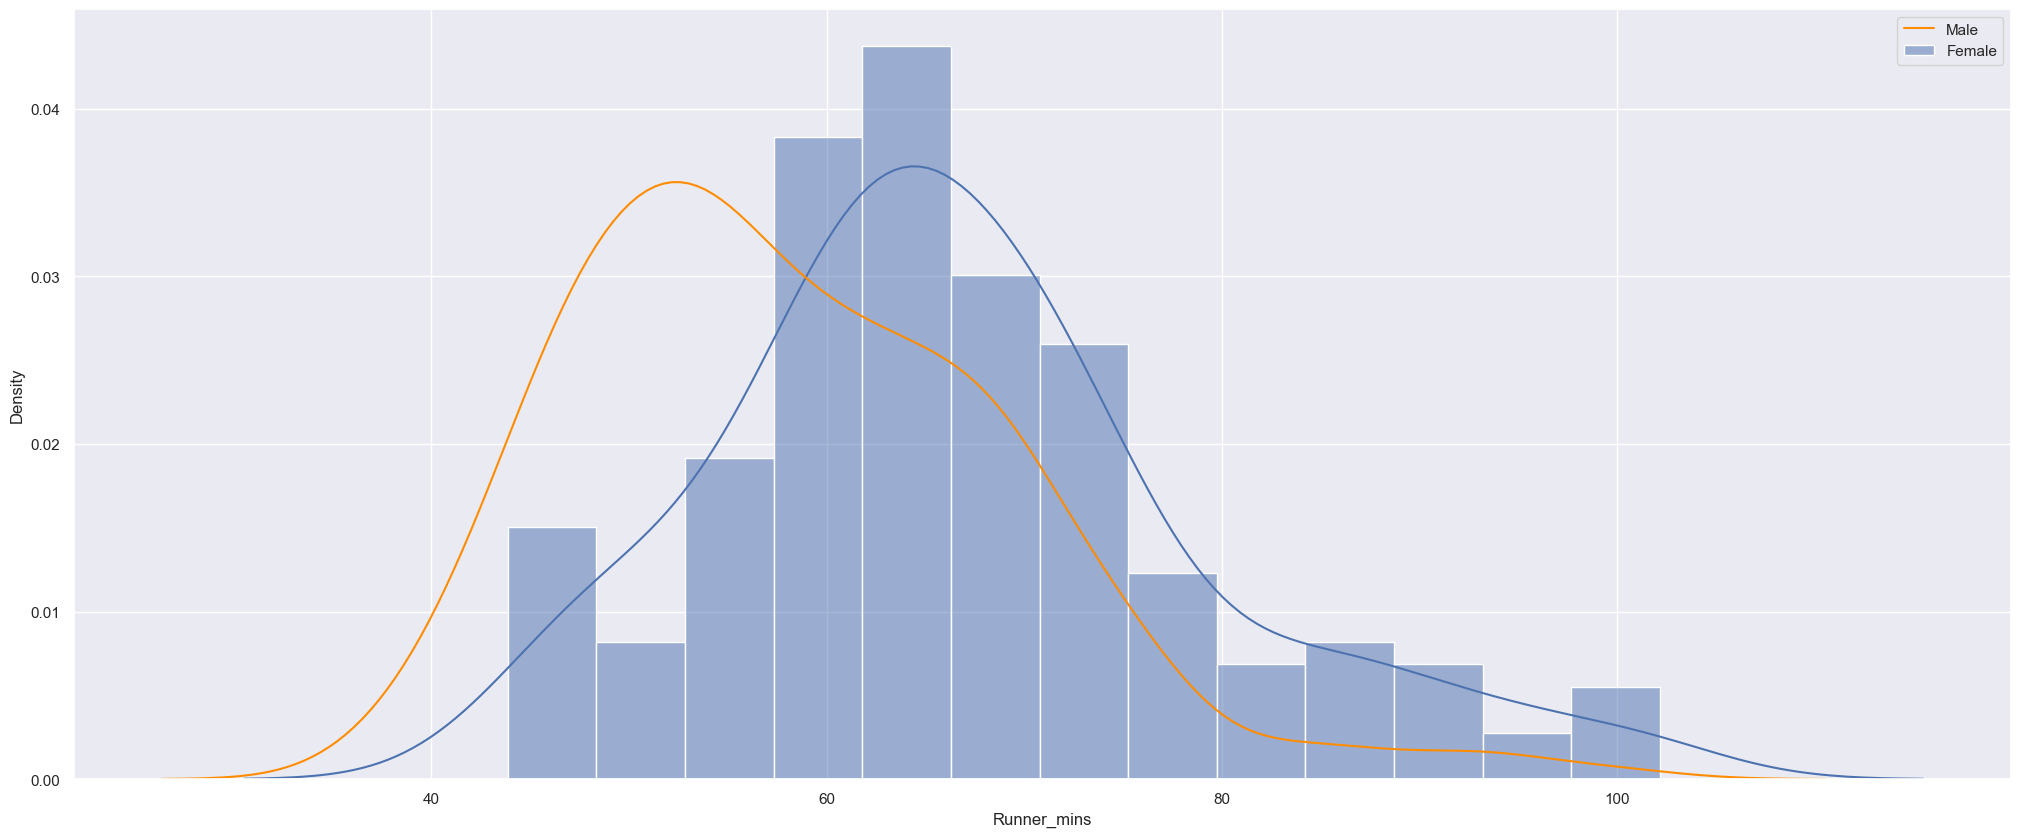

In [ ]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
# sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
# sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
# rcParams['figure.figsize'] = 25, 10
# plt.legend()
# plt.show()
sns.histplot(f_fuko,kde=True, label="Female",stat="density", kde_kws=dict(cut=3))
sns.kdeplot(m_fuko,color="darkorange", label="Male")
plt.legend()

In [ ]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                      \
              count       mean        std        min        25%     50%   
 Gender                                                                   
 F            163.0  66.743252  12.287397  43.866667  59.283333  65.200   
 M            414.0  58.224960  11.170953  36.400000  49.787500  56.475   

                                
               75%         max  
 Gender                         
 F       72.358333  102.166667  
 M       65.429167  100.533333  


Text(0.5, 0.98, '')

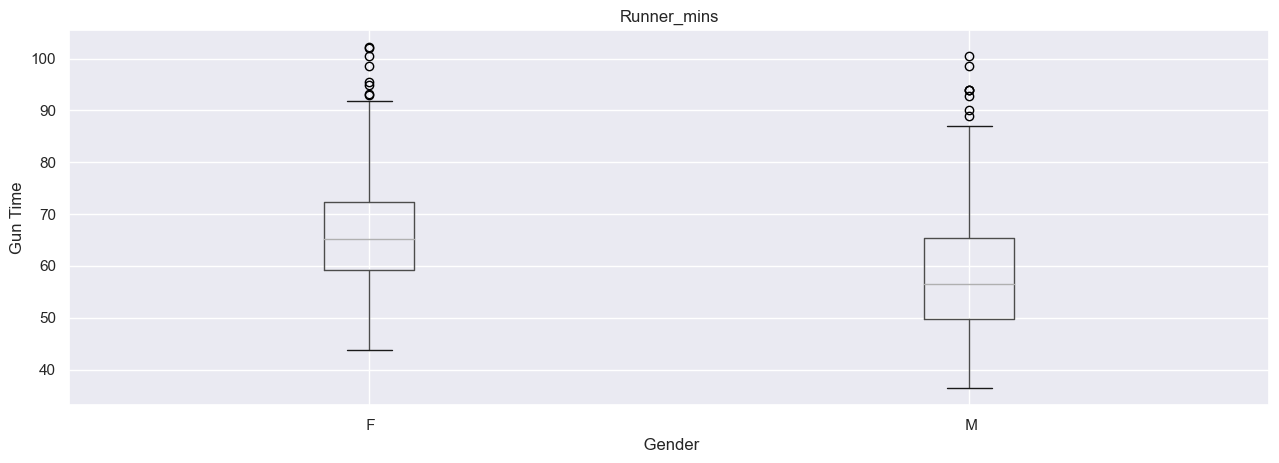

In [ ]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Gun Time')
plt.suptitle("")